# Vehicle Detection Project #

## The goals / steps of this project are the following:##

### * Perform a Histogram of Oriented Gradients (HOG) feature extraction on a labeled training set of images and train a classifier Linear SVM classifier ####
### * Optionally, you can also apply a color transform and append binned color features, as well as histograms of color, to your HOG feature vector. ####
### * Note: for those first two steps don't forget to normalize your features and randomize a selection for training and testing.####
### * Implement a sliding-window technique and use your trained classifier to search for vehicles in images. ####
### * Run your pipeline on a video stream (start with the test_video.mp4 and later implement on full project_video.mp4) and create a heat map of recurring detections frame by frame to reject outliers and follow detected vehicles. ####
### * Estimate a bounding box for vehicles detected.####

## [Rubric](https://review.udacity.com/#!/rubrics/513/view) Points
### Here I will consider the rubric points individually and describe how I addressed each point in my implementation. 

---
### Writeup / README

#### 1. Provide a Writeup / README that includes all the rubric points and how you addressed each one.  You can submit your writeup as markdown or pdf.  [Here](https://github.com/udacity/CarND-Vehicle-Detection/blob/master/writeup_template.md) is a template writeup for this project you can use as a guide and a starting point.  


In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
from sklearn.externals import joblib

% matplotlib inline

### Histogram of Oriented Gradients (HOG)

#### 1. Explain how (and identify where in your code) you extracted HOG features from the training images.

The code for this step is contained in the first code cell of the IPython notebook (or in lines # through # of the file called `some_file.py`).  

I started by reading in all the `vehicle` and `non-vehicle` images.  Here is an example of one of each of the `vehicle` and `non-vehicle` classes:


In [2]:
# first of all, read in image directories for cars and non-cars
cars_dir = glob.glob('vehicles/*/*.png')
print('{} images for vehicles'.format(len(cars_dir)))
non_cars_dir = glob.glob('non-vehicles/*/*.png')
print('{} images for non-vehicles'.format(len(non_cars_dir)))

8792 images for vehicles
8968 images for non-vehicles


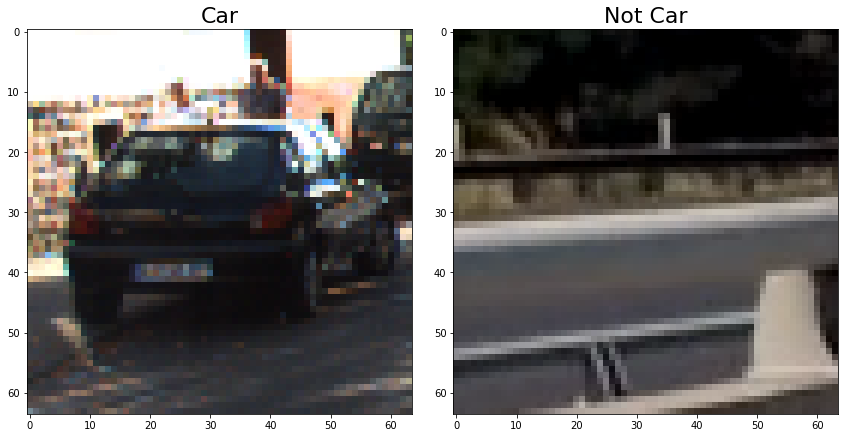

In [3]:
import random
rand_car_index = random.randint(0,len(cars_dir))
rand_car = mpimg.imread(cars_dir[rand_car_index])

rand_non_car_index = random.randint(0,len(non_cars_dir))
rand_non_car = mpimg.imread(non_cars_dir[rand_non_car_index])

fig, (ax1,ax2)= plt.subplots(1,2,figsize=(12, 9))
fig.tight_layout()
ax1.imshow(rand_car)
# plt.add_title('Car',fontsize=22)
ax1.set_title('Car',fontsize=22)

ax2.imshow(rand_non_car)
ax2.set_title('Not Car',fontsize=22)
fig.savefig('output_images/car_non_car.jpg')
# plt.imsave('output_images/')

I then explored different color spaces and different `skimage.hog()` parameters (`orientations`, `pixels_per_cell`, and `cells_per_block`).  I grabbed random images from each of the two classes and displayed them to get a feel for what the `skimage.hog()` output looks like.

Here is an example using the `HLS`,`YCrCb` color space and HOG parameters of `orientations=8`, `pixels_per_cell=(8, 8)` and `cells_per_block=(2, 2)` respectively for sample car image:

/home/keven/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


(1, 1, 8, 8, 8)


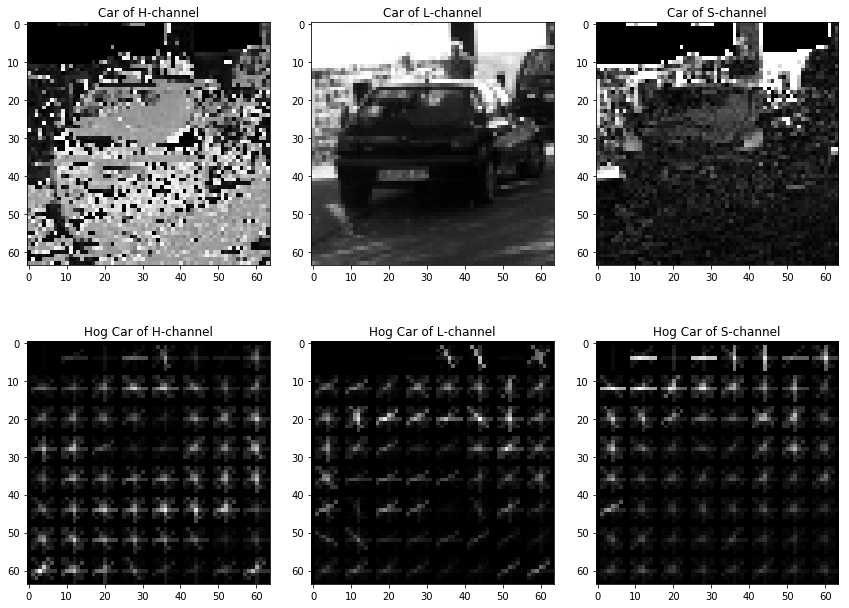

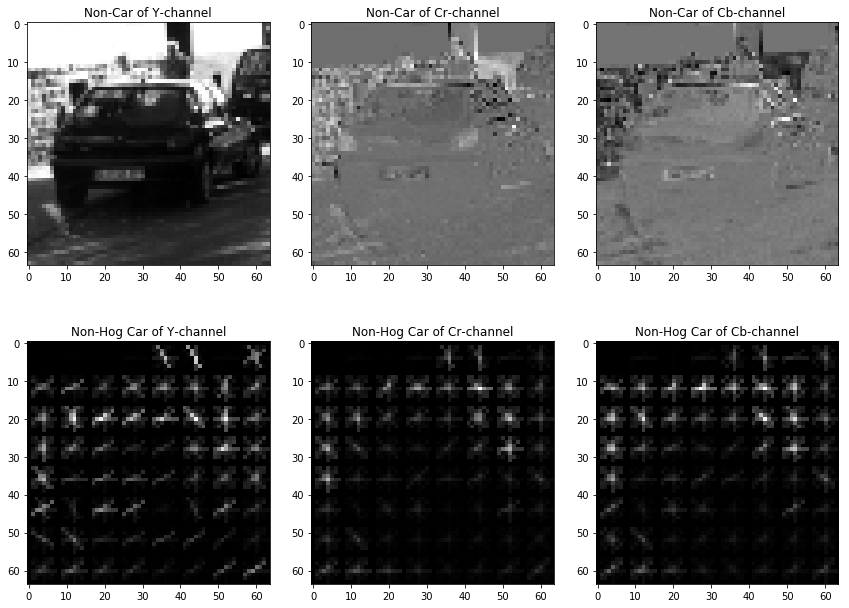

In [4]:
from skimage.feature import hog
orient = 8
pix_per_cell = 8
cell_per_block = 8

rand_car_ycrcb = cv2.cvtColor(rand_car,cv2.COLOR_RGB2HLS)
fig,axes = plt.subplots(2,3,figsize = (12,9))
fig.tight_layout()

axes[0,0].imshow(rand_car_ycrcb[:,:,0],cmap='gray')
axes[0,0].set_title('Car of H-channel')

axes[0,1].imshow(rand_car_ycrcb[:,:,1],cmap='gray')
axes[0,1].set_title('Car of L-channel')

axes[0,2].imshow(rand_car_ycrcb[:,:,2],cmap='gray')
axes[0,2].set_title('Car of S-channel')

# rand_car_gray = cv2.cvtColor(rand_car,cv2.COLOR_RGB2GRAY)
features, hog_image_0 = hog(rand_car_ycrcb[:,:,0], orientations=orient, 
                                  pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block), 
                                  transform_sqrt=True, 
                                  visualise=True, feature_vector=False)
features, hog_image_1 = hog(rand_car_ycrcb[:,:,1], orientations=orient, 
                                  pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block), 
                                  transform_sqrt=True, 
                                  visualise=True, feature_vector=False)
features, hog_image_2 = hog(rand_car_ycrcb[:,:,2], orientations=orient, 
                                  pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block), 
                                  transform_sqrt=True, 
                                  visualise=True, feature_vector=False)

axes[1,0].imshow(hog_image_0,cmap='gray')
axes[1,0].set_title('Hog Car of H-channel')

axes[1,1].imshow(hog_image_1,cmap='gray')
axes[1,1].set_title('Hog Car of L-channel')

axes[1,2].imshow(hog_image_2,cmap='gray')
axes[1,2].set_title('Hog Car of S-channel')
fig.savefig('output_images/HLS_HOG_car.jpg')

############non-car##################
rand_non_car_ycrcb = cv2.cvtColor(rand_car,cv2.COLOR_RGB2YCrCb)
fig,axes = plt.subplots(2,3,figsize = (12,9))
fig.tight_layout()

axes[0,0].imshow(rand_non_car_ycrcb[:,:,0],cmap='gray')
axes[0,0].set_title('Non-Car of Y-channel')

axes[0,1].imshow(rand_non_car_ycrcb[:,:,1],cmap='gray')
axes[0,1].set_title('Non-Car of Cr-channel')

axes[0,2].imshow(rand_non_car_ycrcb[:,:,2],cmap='gray')
axes[0,2].set_title('Non-Car of Cb-channel')

# rand_car_gray = cv2.cvtColor(rand_car,cv2.COLOR_RGB2GRAY)
features, hog_image_0 = hog(rand_non_car_ycrcb[:,:,0], orientations=orient, 
                                  pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block), 
                                  transform_sqrt=True, 
                                  visualise=True, feature_vector=False)
features, hog_image_1 = hog(rand_non_car_ycrcb[:,:,1], orientations=orient, 
                                  pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block), 
                                  transform_sqrt=True, 
                                  visualise=True, feature_vector=False)
features, hog_image_2 = hog(rand_non_car_ycrcb[:,:,2], orientations=orient, 
                                  pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block), 
                                  transform_sqrt=True, 
                                  visualise=True, feature_vector=False)

print(features.shape)

axes[1,0].imshow(hog_image_0,cmap='gray')
axes[1,0].set_title('Non-Hog Car of Y-channel')

axes[1,1].imshow(hog_image_1,cmap='gray')
axes[1,1].set_title('Non-Hog Car of Cr-channel')

axes[1,2].imshow(hog_image_2,cmap='gray')
axes[1,2].set_title('Non-Hog Car of Cb-channel')
fig.savefig('output_images/YCrCb_HOG_car.jpg')

# plt.imshow(hog_image,cmap = 'gray')

We can see that the hog images of `YCrCb` transform image contain more generated vectors for all three channels than `HLS` transform image and the former show slightly higher prediction accuracy than the latter. So I will use YCrCb transform to generate hog vector images in my following code. 

#### 2. Explain how you settled on your final choice of HOG parameters.

I tried various combinations of parameters and find `orientations=8`, `pixels_per_cell=(8, 8)` and `cells_per_block=(2, 2)` will give best prediction accuracy when fitting the generated features to classifier. I also tried `pixels_per_cell=(4, 4)` but that caused my computer crashed as this exhausting all resources of my computer. So I can only tweak the parameters within generated features of size around 8000.

#### 3. Describe how (and identify where in your code) you trained a classifier using your selected HOG features (and color features if you used them).

I trained a linear SVM using `svc = LinearSVC()` and before fitting into classifier, I normalized input features with `StandardScaler`.

In [5]:
import time
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from skimage.feature import hog
# from lesson_functions import *
# NOTE: the next import is only valid for scikit-learn version <= 0.17
# for scikit-learn >= 0.18 use:
from sklearn.model_selection import train_test_split
# from sklearn.cross_validation import train_test_split
# Define a function to return HOG features and visualization
def get_hog_features(img, orient, pix_per_cell, cell_per_block, 
                        vis=False, feature_vec=True):
    # Call with two outputs if vis==True
    if vis == True:
        features, hog_image = hog(img, orientations=orient, 
                                  pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block), 
                                  transform_sqrt=True, 
                                  visualise=vis, feature_vector=feature_vec)
        return features, hog_image
    # Otherwise call with one output
    else:      
        features = hog(img, orientations=orient, 
                       pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block), 
                       transform_sqrt=True, 
                       visualise=vis, feature_vector=feature_vec)
        return features

# Define a function to compute binned color features  
def bin_spatial(img, size=(32, 32)):
    # Use cv2.resize().ravel() to create the feature vector
    features = cv2.resize(img, size).ravel() 
    # Return the feature vector
    return features

# Define a function to compute color histogram features 
# NEED TO CHANGE bins_range if reading .png files with mpimg!
def color_hist(img, nbins=32, bins_range=(0, 256)):
    # Compute the histogram of the color channels separately
    channel1_hist = np.histogram(img[:,:,0], bins=nbins, range=bins_range)
    channel2_hist = np.histogram(img[:,:,1], bins=nbins, range=bins_range)
    channel3_hist = np.histogram(img[:,:,2], bins=nbins, range=bins_range)
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((channel1_hist[0], channel2_hist[0], channel3_hist[0]))
    # Return the individual histograms, bin_centers and feature vector
    return hist_features

# Define a function to extract features from a list of images
# Have this function call bin_spatial() and color_hist()
def extract_features(imgs, color_space='RGB', spatial_size=(32, 32),
                        hist_bins=32, orient=9, 
                        pix_per_cell=8, cell_per_block=2, hog_channel=0,
                        spatial_feat=True, hist_feat=True, hog_feat=True):
    # Create a list to append feature vectors to
    features = []
    # Iterate through the list of images
    for file in imgs:
        file_features = []
        # Read in each one by one
        image = mpimg.imread(file)
        # apply color conversion if other than 'RGB'
        if color_space != 'RGB':
            if color_space == 'HSV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
            elif color_space == 'LUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2LUV)
            elif color_space == 'HLS':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
            elif color_space == 'YUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
            elif color_space == 'YCrCb':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)
        else: feature_image = np.copy(image)      

        if spatial_feat == True:
            spatial_features = bin_spatial(feature_image, size=spatial_size)
            file_features.append(spatial_features)
        if hist_feat == True:
            # Apply color_hist()
            hist_features = color_hist(feature_image, nbins=hist_bins)
            file_features.append(hist_features)
        if hog_feat == True:
        # Call get_hog_features() with vis=False, feature_vec=True
            if hog_channel == 'ALL':
                hog_features = []
                for channel in range(feature_image.shape[2]):
                    hog_features.append(get_hog_features(feature_image[:,:,channel], 
                                        orient, pix_per_cell, cell_per_block, 
                                        vis=False, feature_vec=True))
                hog_features = np.ravel(hog_features)        
            else:
                hog_features = get_hog_features(feature_image[:,:,hog_channel], orient, 
                            pix_per_cell, cell_per_block, vis=False, feature_vec=True)
            # Append the new feature vector to the features list
            file_features.append(hog_features)
        features.append(np.concatenate(file_features))
    # Return list of feature vectors
    return features

# samp_img = mpimg.imread(cars[0])
# y_span = np.array(samp_img).shape
# print('Image shape: ',y_span)
color_space = 'YCrCb' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 12  # HOG orientations
pix_per_cell = 8 # HOG pixels per cell
cell_per_block = 2 # HOG cells per block
hog_channel = "ALL" # Can be 0, 1, 2, or "ALL"
spatial_size = (16, 16) # Spatial binning dimensions
hist_bins = 16    # Number of histogram bins
spatial_feat = True # Spatial features on or off
hist_feat = True # Histogram features on or off
hog_feat = True # HOG features on or off
# y_start_stop = [400, None] # Min and max in y to search in slide_window()

car_features = extract_features(cars_dir, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)
notcar_features = extract_features(non_cars_dir, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)

X = np.vstack((car_features, notcar_features)).astype(np.float64)                        
# Fit a per-column scaler
X_scaler = StandardScaler().fit(X)
# Apply the scaler to X
scaled_X = X_scaler.transform(X)

# Define the labels vector
y = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features))))


# Split up data into randomized training and test sets
rand_state = np.random.randint(0, 100)
X_train, X_test, y_train, y_test = train_test_split(
    scaled_X, y, test_size=0.2, random_state=rand_state)

print('Using:',orient,'orientations',pix_per_cell,
    'pixels per cell and', cell_per_block,'cells per block')
print('Feature vector length:', len(X_train[0]))

/home/keven/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


Using: 12 orientations 8 pixels per cell and 2 cells per block
Feature vector length: 7872


In [68]:
# Use a linear SVC 
svc = LinearSVC()
# Check the training time for the SVC
t=time.time()
svc.fit(X_train, y_train)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to train SVC...')
# Check the score of the SVC
print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))
# Check the prediction time for a single sample
t=time.time()

24.06 Seconds to train SVC...
Test Accuracy of SVC =  0.987


In [76]:
joblib.dump(svc, 'trained_svc.pkl')

['trained_svc.pkl']

### Sliding Window Search

#### 1. Describe how (and identify where in your code) you implemented a sliding window search.  How did you decide what scales to search and how much to overlap windows?

I decided to search random window positions at random scales all over the image and came up with this (ok just kidding I didn't actually ;):

In [26]:
from scipy.ndimage.measurements import label
svc = joblib.load('trained_svc.pkl') 

def convert_color(img, conv='RGB2YCrCb'):
    if conv == 'RGB2YCrCb':
        return cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    if conv == 'BGR2YCrCb':
        return cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
    if conv == 'RGB2LUV':
        return cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
    
# Define a single function that can extract features using hog sub-sampling and make predictions
def get_box_list(img, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins):
    
    draw_img = np.copy(img)
    img = img.astype(np.float32)/255
    
    img_tosearch = img[ystart:ystop,:,:]
    ctrans_tosearch = convert_color(img_tosearch, conv='RGB2YCrCb')
    if scale != 1:
        imshape = ctrans_tosearch.shape
        ctrans_tosearch = cv2.resize(ctrans_tosearch, (np.int(imshape[1]/scale), np.int(imshape[0]/scale)))
        
    ch1 = ctrans_tosearch[:,:,0]
    ch2 = ctrans_tosearch[:,:,1]
    ch3 = ctrans_tosearch[:,:,2]

    # Define blocks and steps as above
    nxblocks = (ch1.shape[1] // pix_per_cell) - cell_per_block + 1
    nyblocks = (ch1.shape[0] // pix_per_cell) - cell_per_block + 1 
    nfeat_per_block = orient*cell_per_block**2
    
    # 64 was the orginal sampling rate, with 8 cells and 8 pix per cell
    window = 64
    nblocks_per_window = (window // pix_per_cell) - cell_per_block + 1
    cells_per_step = 2  # Instead of overlap, define how many cells to step
    nxsteps = (nxblocks - nblocks_per_window) // cells_per_step + 1
    nysteps = (nyblocks - nblocks_per_window) // cells_per_step + 1
    
    # Compute individual channel HOG features for the entire image
    hog1 = get_hog_features(ch1, orient, pix_per_cell, cell_per_block, feature_vec=False)
    hog2 = get_hog_features(ch2, orient, pix_per_cell, cell_per_block, feature_vec=False)
    hog3 = get_hog_features(ch3, orient, pix_per_cell, cell_per_block, feature_vec=False)
    
    on_windows = []
    for xb in range(nxsteps):
        for yb in range(nysteps):
            ypos = yb*cells_per_step
            xpos = xb*cells_per_step
            # Extract HOG for this patch
            hog_feat1 = hog1[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_feat2 = hog2[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_feat3 = hog3[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_features = np.hstack((hog_feat1, hog_feat2, hog_feat3))

            xleft = xpos*pix_per_cell
            ytop = ypos*pix_per_cell

            # Extract the image patch
            subimg = cv2.resize(ctrans_tosearch[ytop:ytop+window, xleft:xleft+window], (64,64))
          
            # Get color features
            spatial_features = bin_spatial(subimg, size=spatial_size)
            hist_features = color_hist(subimg, nbins=hist_bins)

            # Scale features and make a prediction
            test_features = X_scaler.transform(np.hstack((spatial_features, hist_features, hog_features)).reshape(1, -1))    
            #test_features = X_scaler.transform(np.hstack((shape_feat, hist_feat)).reshape(1, -1))    
            test_prediction = svc.predict(test_features)
            
            if test_prediction == 1:
                xbox_left = np.int(xleft*scale)
                ytop_draw = np.int(ytop*scale)
                win_draw = np.int(window*scale)
                on_windows.append([[xbox_left, ytop_draw+ystart],[xbox_left+win_draw,ytop_draw+win_draw+ystart]])
#                 cv2.rectangle(draw_img,(xbox_left, ytop_draw+ystart),(xbox_left+win_draw,ytop_draw+win_draw+ystart),(0,0,255),6) 
                
    return on_windows

def add_heat(heatmap, bbox_list):
    # Iterate through list of bboxes
    for box in bbox_list:
        # Add += 1 for all pixels inside each bbox
        # Assuming each "box" takes the form ((x1, y1), (x2, y2))
        heatmap[box[0][1]:box[1][1], box[0][0]:box[1][0]] += 1

    # Return updated heatmap
    return heatmap# Iterate through list of bboxes
    
def apply_threshold(heatmap, threshold):
    # Zero out pixels below the threshold
    heatmap[heatmap <= threshold] = 0
    # Return thresholded map
    return heatmap

max_margin = 10
def draw_labeled_bboxes(img, labels,box_hist):
    box_list = []
    # Iterate through all detected cars
    for car_number in range(1, labels[1]+1):
        # Find pixels with each car_number label value
        nonzero = (labels[0] == car_number).nonzero()
        # Identify x and y values of those pixels
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        x_min = np.min(nonzerox)
        y_min = np.min(nonzeroy)
        x_max = np.max(nonzerox)
        y_max = np.max(nonzeroy)
        
        find_num = 0
        if len(box_hist)>=1:#not empty
            # check if new detected box is valid
            for box in box_hist:
                
                if x_min > box[0][0]-max_margin or x_min < box[0][0]+max_margin:
                    x_min = np.int(x_min*0.6+box[0][0]*0.4)
                    find_num=find_num+1

                if y_min > box[0][1]-max_margin or y_min < box[0][1]+max_margin:
                    y_min = np.int(y_min*0.6+box[0][1]*0.4)
                    find_num=find_num+1

                if x_max > box[1][0]-max_margin or x_max < box[1][0]+max_margin:
                    x_max = np.int(x_max*0.6+box[1][0]*0.4)
                    find_num=find_num+1

                if y_max > box[1][1]-max_margin or y_max < box[1][1]+max_margin:
                    y_max = np.int(y_max*0.6+box[1][1]*0.4)
                    find_num=find_num+1
                if find_num > 2:
                    continue
                    
        # Define a bounding box based on min/max x and y
        bbox = ((x_min,y_min), (x_max, y_max))
        box_list.append(bbox)
        # Draw the box on the image
        cv2.rectangle(img, bbox[0], bbox[1], (0,0,255), 6)
        
    box_hist = box_list
    
#     if len(box_list) < 1:
#         empty = True
#     else:
#         empty = False
    # Return the image
    return img


#### 2. Show some examples of test images to demonstrate how your pipeline is working.  What did you do to optimize the performance of your classifier?

Ultimately I searched on two scales using YCrCb 3-channel HOG features plus spatially binned color and histograms of color in the feature vector, which provided a nice result.  Here are some example images:

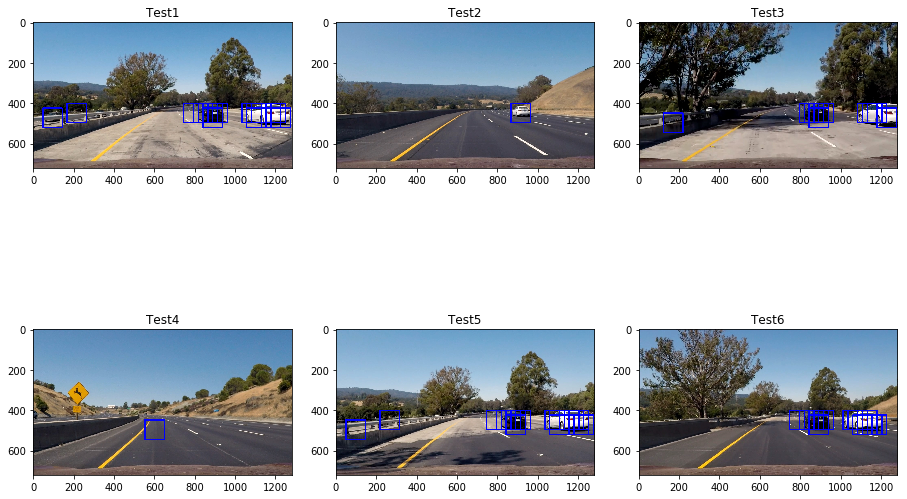

In [43]:
# Define a function to draw bounding boxes
def draw_boxes(img, bboxes, color=(0, 0, 255), thick=6):
    # Make a copy of the image
    imcopy = np.copy(img)
    # Iterate through the bounding boxes
    for bbox in bboxes:
        bbox = tuple(bbox)
        # Draw a rectangle given bbox coordinates
        cv2.rectangle(imcopy, tuple(bbox[0]), tuple(bbox[1]), color, thick)
    # Return the image copy with boxes drawn
    return imcopy

test_images = glob.glob('test_images/*.jpg')
out_imgs = []
out_heat = []
# box_list = []
f,axes = plt.subplots(2,3,figsize = (12,9))

plt.tight_layout()
for img in test_images:
    
    img = mpimg.imread(img)
    box_lst = get_box_list(img, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
    box_lst = tuple(box_lst)
    out_img = draw_boxes(img,box_lst)
#     out_heat.append(heat_img)
    out_imgs.append(out_img)
#     box_list.append(bboxes)
    
axes[0,0].imshow(out_imgs[0])
axes[0,0].set_title('Test1')

axes[0,1].imshow(out_imgs[1])
axes[0,1].set_title('Test2')

axes[0,2].imshow(out_imgs[2])
axes[0,2].set_title('Test3')

axes[1,0].imshow(out_imgs[3])
axes[1,0].set_title('Test4')

axes[1,1].imshow(out_imgs[4])
axes[1,1].set_title('Test5')

axes[1,2].imshow(out_imgs[5])
axes[1,2].set_title('Test6')

plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
f.savefig('output_images/detected_vehicles_of_boxes.jpg')

In [54]:
# store boxes from previous frames
# max size is 8
box_hist = []
def find_cars(img,ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins):
    image = np.copy(img)
    if None is image or image.shape[2] < 3:
        print('Bad image input!')
        return
    # get detected box list
    box_list = get_box_list(image, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
    
    heat = np.zeros_like(image[:,:,0]).astype(np.float)
    # Add heat to each box in box list
    heat = add_heat(heat,box_list)
    
    # Apply threshold to help remove false positives
    heat = apply_threshold(heat,1)

    # Visualize the heatmap when displaying    
    heatmap = np.clip(heat, 0, 255)

    # Find final boxes from heatmap using label function
    labels = label(heatmap)
    draw_img = draw_labeled_bboxes(np.copy(image), labels,box_hist)
    
    return draw_img,heatmap,labels


ystart = 400
ystop = 656
scale = 1.5

def pipeline(img):
    draw_img,_,_ = find_cars(img, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
    return draw_img

### Video Implementation

#### 1. Provide a link to your final video output.  Your pipeline should perform reasonably well on the entire project video (somewhat wobbly or unstable bounding boxes are ok as long as you are identifying the vehicles most of the time with minimal false positives.)

In [17]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML
import os

In [39]:
test_output = 'test_video_output.mp4'
clip1 = VideoFileClip("test_video.mp4")
white_clip = clip1.fl_image(pipeline)
%time white_clip.write_videofile(os.path.join(test_output), audio=False)

[MoviePy] >>>> Building video test_video_output.mp4
[MoviePy] Writing video test_video_output.mp4


 97%|█████████▋| 38/39 [00:15<00:00,  2.33it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_video_output.mp4 

CPU times: user 18.5 s, sys: 148 ms, total: 18.6 s
Wall time: 16.6 s


In [40]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(test_output))

In [25]:
project_output = 'project_video_output.mp4'
clip1 = VideoFileClip("project_video.mp4")
white_clip = clip1.fl_image(pipeline)
%time white_clip.write_videofile(os.path.join(project_output), audio=False)

[MoviePy] >>>> Building video project_video_output.mp4
[MoviePy] Writing video project_video_output.mp4


100%|█████████▉| 1260/1261 [08:03<00:00,  2.59it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: project_video_output.mp4 

CPU times: user 9min 44s, sys: 2.74 s, total: 9min 46s
Wall time: 8min 4s


In [27]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(project_output))

#### 2. Describe how (and identify where in your code) you implemented some kind of filter for false positives and some method for combining overlapping bounding boxes.

I recorded the positions of positive detections in each frame of the video.  From the positive detections I created a heatmap and then thresholded that map to identify vehicle positions.  I then used `scipy.ndimage.measurements.label()` to identify individual blobs in the heatmap.  I then assumed each blob corresponded to a vehicle.  I constructed bounding boxes to cover the area of each blob detected.  

Here's an example result showing the heatmap from a series of frames of video, the result of `scipy.ndimage.measurements.label()` and the bounding boxes then overlaid on the last frame of video:

### Here are six frames and their corresponding heatmaps:

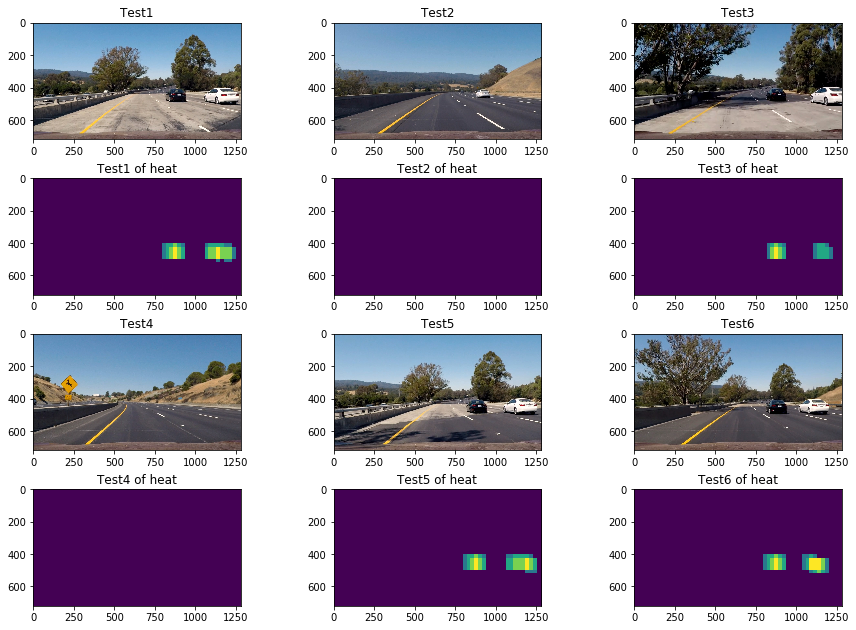

In [62]:
f,axes = plt.subplots(4,3,figsize = (12,9))

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)
out_heat = []
out_imgs = []
images = []
out_labels = []
for img in test_images:
    
    img = mpimg.imread(img)
    images.append(img)
    out_img,heat_img,out_label = find_cars(img, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
    out_heat.append(heat_img)
    out_imgs.append(out_img)
    out_labels.append(out_label)
#     box_list.append(bboxes)
    
axes[0,0].imshow(images[0])
axes[0,0].set_title('Test1')

# print('heatmaps shape: ',heatmaps.shape)
# print('There are ',heatmaps[0][1],' features found')
# print(np.nonzero(heatmaps[0][0]))

axes[0,1].imshow(images[1])
axes[0,1].set_title('Test2')
# print('There are ',heatmaps[1][1],' features found')
# print(np.nonzero(heatmaps[1][0]))
# print(box_list[0])

axes[0,2].imshow(images[2])
axes[0,2].set_title('Test3')
# print(heatmaps[2][0])
# print(box_list[1])


axes[1,0].imshow(out_heat[0])
axes[1,0].set_title('Test1 of heat')
# print(heatmaps[3][0])
# print(box_list[2])


axes[1,1].imshow(out_heat[1])
axes[1,1].set_title('Test2 of heat')
# print(heatmaps[4][0])

axes[1,2].imshow(out_heat[2])
axes[1,2].set_title('Test3 of heat')
# print(heatmaps[5][0])

axes[2,0].imshow(images[3])
axes[2,0].set_title('Test4')

axes[2,1].imshow(images[4])
axes[2,1].set_title('Test5')

axes[2,2].imshow(images[5])
axes[2,2].set_title('Test6')

axes[3,0].imshow(out_heat[3])
axes[3,0].set_title('Test4 of heat')

axes[3,1].imshow(out_heat[4])
axes[3,1].set_title('Test5 of heat')

axes[3,2].imshow(out_heat[5])
axes[3,2].set_title('Test6 of heat')

plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
f.savefig('output_images/heatmap_detected_vehicles.jpg')

### Here is the output of `scipy.ndimage.measurements.label()` on the integrated heatmap from all six frames:

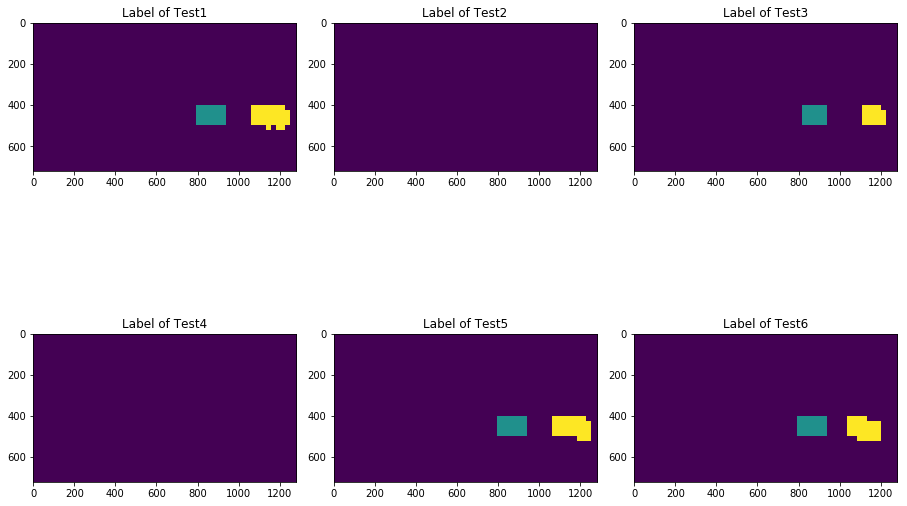

In [66]:
f,axes = plt.subplots(2,3,figsize = (12,9))

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)

axes[0,0].imshow(out_labels[0][0])
axes[0,0].set_title('Label of Test1')

axes[0,1].imshow(out_labels[1][0])
axes[0,1].set_title('Label of Test2')

axes[0,2].imshow(out_labels[2][0])
axes[0,2].set_title('Label of Test3')

axes[1,0].imshow(out_labels[3][0])
axes[1,0].set_title('Label of Test4')

axes[1,1].imshow(out_labels[4][0])
axes[1,1].set_title('Label of Test5')

axes[1,2].imshow(out_labels[5][0])
axes[1,2].set_title('Label of Test6')

plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
f.savefig('output_images/label_detected_vehicles.jpg')

### Here the resulting bounding boxes are drawn onto the last frame in the series:

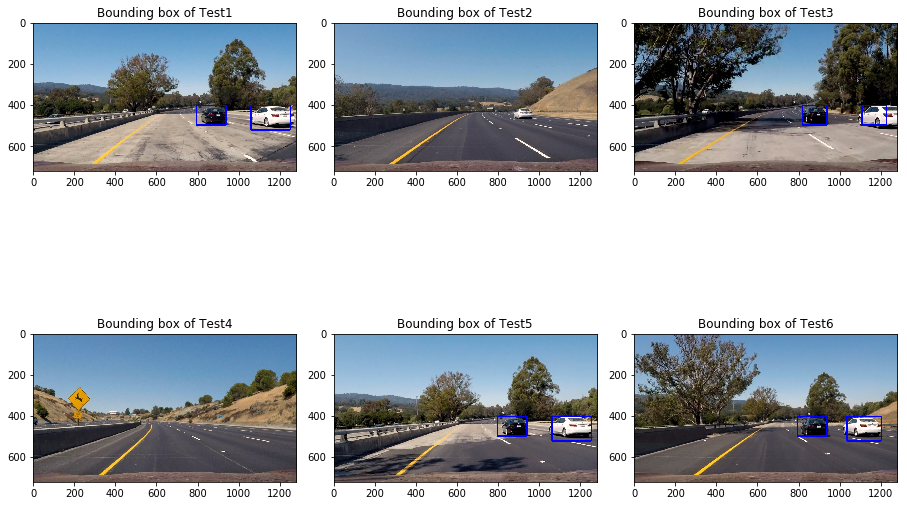

In [67]:
f,axes = plt.subplots(2,3,figsize = (12,9))

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)

axes[0,0].imshow(out_imgs[0])
axes[0,0].set_title('Bounding box of Test1')

axes[0,1].imshow(out_imgs[1])
axes[0,1].set_title('Bounding box of Test2')

axes[0,2].imshow(out_imgs[2])
axes[0,2].set_title('Bounding box of Test3')

axes[1,0].imshow(out_imgs[3])
axes[1,0].set_title('Bounding box of Test4')

axes[1,1].imshow(out_imgs[4])
axes[1,1].set_title('Bounding box of Test5')

axes[1,2].imshow(out_imgs[5])
axes[1,2].set_title('Bounding box of Test6')

plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
f.savefig('output_images/Bounding_box_detected_vehicles.jpg')

### Discussion

#### 1. Briefly discuss any problems / issues you faced in your implementation of this project.  Where will your pipeline likely fail?  What could you do to make it more robust?

Here I'll talk about the approach I took, what techniques I used, what worked and why, where the pipeline might fail and how I might improve it if I were going to pursue this project further.

There are two potential points where failure could occur. 

One is the classifier. Although I got more than 0.98 for test accuracy of my classifier, it still could give false positive predictions on project videos. One main reason is the classifier was not fed with enough images especially with images similar to project video so the classifier cannot get sense for car or non-car objects in project videos. Of course I can add some preprocessing to avoid some difficult light conditions. Thus the possible way to inprove this will be capture more images similar to project video or use udacity database.

Another is the pipeline. As it occurs often where the classifier fails to give 'right' bounding boxes or even cannot detect vehicles in some difficult light conditions, I add a tracking list and a snippet of code to address the former one but I didn't handle the latter. One possible way could be add tracing queue of detected boxes of past consecutive frames like in previous project Advanced Lane Line. But I didn't have enough time to implement all this as I was off the course during the new year holiday backing to China to see my parents for 15 days.